
#### **Rossmann Store Sales Prediction**
##### This project aims to predict daily sales for Rossmann stores using historical sales data, store characteristics, promotions, and other relevant factors. The project will involve data cleaning, exploratory data analysis (EDA), feature engineering, model building, and prediction.

### **1.Project Definition and Objectives**
**Objective** 
- To predict daily sales for Rossmann stores based on historical data and various features such as store type, promotions, and competition.

**Goals**
- Understand the key factors that influence sales in retail stores.
- Build a predictive model that can accurately forecast sales for Rossmann stores.
- Identify actionable insights for improving sales based on model predictions.

**DataSets**
- train.csv: Historical sales data.
- store.csv: Store-related features.
- test.csv: Data for making predictions.
- sample_submission.csv: Example submission format.

### **Creating enviroment**


In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose


-------------------------------------------------------------------------------------------------------------------

### **2.Data Lodaing, Cleaning and preproccessing**

**Loading Data** 
- Import all datasets into pandas DataFrames.



In [4]:
import os
print(os.getcwd())


/Users/mustafaaldabbas/Documents/GitHub/Rossmann-sales-prediction


In [5]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('/Users/mustafaaldabbas/Documents/GitHub/Rossmann-sales-prediction/Datasets/Raw/train.csv')
store_df = pd.read_csv('/Users/mustafaaldabbas/Documents/GitHub/Rossmann-sales-prediction/Datasets/Raw/store.csv')
test_df = pd.read_csv('/Users/mustafaaldabbas/Documents/GitHub/Rossmann-sales-prediction/Datasets/Raw/test.csv')



/var/folders/dc/ldz3k5913l3gjmcgcw60g3x80000gp/T/ipykernel_52459/2427059715.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('/Users/mustafaaldabbas/Documents/GitHub/Rossmann-sales-prediction/Datasets/Raw/train.csv')


In [6]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


**Missing Values**
- Identify and impute missing values or remove columns/rows with excessive missing data.



In [7]:
# Check for missing values in each dataset
missing_train = train_df.isnull().sum()
missing_store = store_df.isnull().sum()
missing_test = test_df.isnull().sum()

# Filter to only show columns with missing values
missing_train = missing_train[missing_train > 0]
missing_store = missing_store[missing_store > 0]
missing_test = missing_test[missing_test > 0]

print("Missing values in train_df:")
print(missing_train)

print("\nMissing values in store_df:")
print(missing_store)

print("\nMissing values in test_df:")
print(missing_test)


Missing values in train_df:
Series([], dtype: int64)

Missing values in store_df:
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Missing values in test_df:
Open    11
dtype: int64


In [8]:
# Handle missing values in store_df
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace=True)
store_df['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
store_df['CompetitionOpenSinceYear'].fillna(0, inplace=True)
store_df['Promo2SinceWeek'].fillna(0, inplace=True)
store_df['Promo2SinceYear'].fillna(0, inplace=True)
store_df['PromoInterval'].fillna('None', inplace=True)

# Handle missing values in test_df
test_df['Open'].fillna(test_df['Open'].mode()[0], inplace=True)

# Verify that there are no remaining missing values
missing_store_after = store_df.isnull().sum()
missing_test_after = test_df.isnull().sum()

print("Remaining missing values in store_df:")
print(missing_store_after[missing_store_after > 0])

print("\nRemaining missing values in test_df:")
print(missing_test_after[missing_test_after > 0])



Remaining missing values in store_df:
Series([], dtype: int64)

Remaining missing values in test_df:
Series([], dtype: int64)


In [ ]:
train_df_merged

**Data Type**
- Convert date columns to datetime and categorical variables to appropriate types.
- ensure categorical Variables are Properly Formatted. 



In [9]:
# Convert Date columns to datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

# Ensure categorical variables are properly formatted
train_df['StateHoliday'] = train_df['StateHoliday'].astype('category')
train_df['Store'] = train_df['Store'].astype('category')
train_df['DayOfWeek'] = train_df['DayOfWeek'].astype('category')
train_df['Promo'] = train_df['Promo'].astype('category')
train_df['SchoolHoliday'] = train_df['SchoolHoliday'].astype('category')

store_df['Store'] = store_df['Store'].astype('category')
store_df['StoreType'] = store_df['StoreType'].astype('category')
store_df['Assortment'] = store_df['Assortment'].astype('category')
store_df['PromoInterval'] = store_df['PromoInterval'].astype('category')

test_df['StateHoliday'] = test_df['StateHoliday'].astype('category')
test_df['Store'] = test_df['Store'].astype('category')
test_df['DayOfWeek'] = test_df['DayOfWeek'].astype('category')
test_df['Promo'] = test_df['Promo'].astype('category')
test_df['SchoolHoliday'] = test_df['SchoolHoliday'].astype('category')

# Display the dtypes to confirm the changes
print("Data types in train_df after conversion:")
print(train_df.dtypes)

print("\nData types in store_df after conversion:")
print(store_df.dtypes)

print("\nData types in test_df after conversion:")
print(test_df.dtypes)


Data types in train_df after conversion:
Store                  category
DayOfWeek              category
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                  category
StateHoliday           category
SchoolHoliday          category
dtype: object

Data types in store_df after conversion:
Store                        category
StoreType                    category
Assortment                   category
CompetitionDistance           float64
CompetitionOpenSinceMonth     float64
CompetitionOpenSinceYear      float64
Promo2                          int64
Promo2SinceWeek               float64
Promo2SinceYear               float64
PromoInterval                category
dtype: object

Data types in test_df after conversion:
Id                        int64
Store                  category
DayOfWeek              category
Date             datetime64[ns]
Open                    float64
Promo               

**Outliers** 
- Visualize the Sales Data Using BOxplot and Histograms
- Identify Outlier using Qq_1.5 or Above Q3+1.5* IQR
- Remove Outliers 



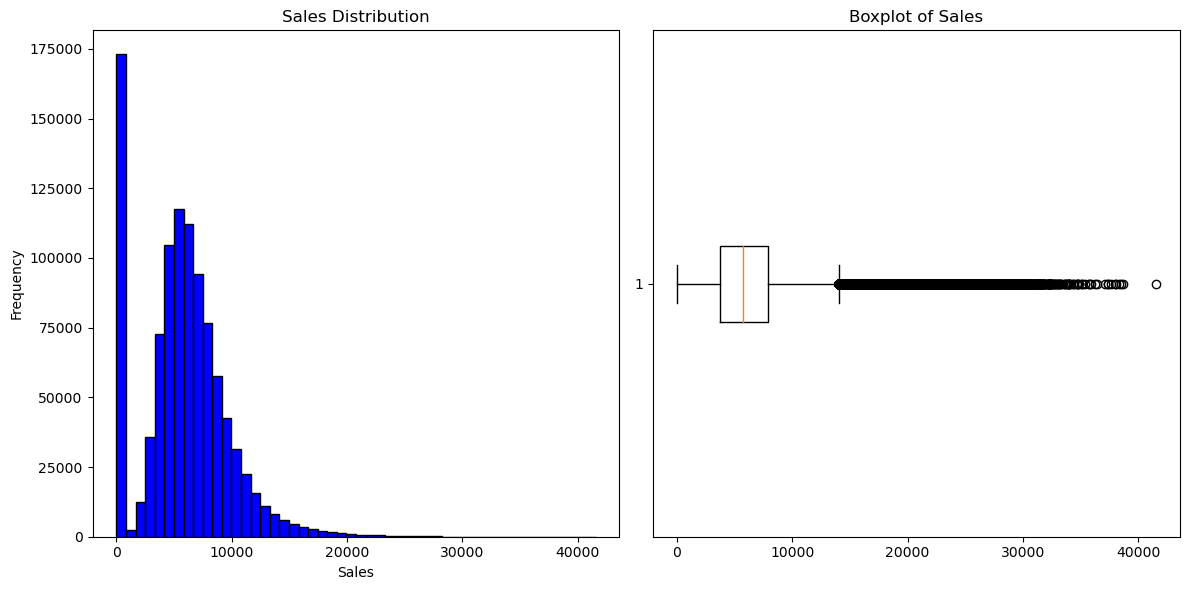

Number of rows before removing outliers: 1017209
Number of rows after removing outliers: 990515


In [10]:
import matplotlib.pyplot as plt

# Step 1: Visualize the Sales Data
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(train_df['Sales'], bins=50, color='blue', edgecolor='black')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(train_df['Sales'], vert=False)
plt.title('Boxplot of Sales')

plt.tight_layout()
plt.show()

# Step 2: Identify Outliers using IQR method
Q1 = train_df['Sales'].quantile(0.25)
Q3 = train_df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Remove Outliers
train_df_cleaned = train_df[(train_df['Sales'] >= lower_bound) & (train_df['Sales'] <= upper_bound)]

# Print the number of rows before and after removing outliers
print(f"Number of rows before removing outliers: {len(train_df)}")
print(f"Number of rows after removing outliers: {len(train_df_cleaned)}")


**Merging Data**
- Merge train_df with store_df: We'll merge these datasets on the Store column, which is common to both datasets.
- Merge test_df with store_df: Similarly, we'll also merge the test dataset with the store information.


In [11]:
# Merge train_df with store_df
train_df_merged = pd.merge(train_df_cleaned, store_df, on='Store', how='left')

# Merge test_df with store_df
test_df_merged = pd.merge(test_df, store_df, on='Store', how='left')

# Display the first few rows of the merged dataframes to confirm the merge
print("Merged train_df:")
print(train_df_merged.head())

print("\nMerged test_df:")
print(test_df_merged.head())

train_df_merged.to_csv('train_df_merged_clean.csv')
test_df_merged.to_csv('test_df_merged.clean.csv')

Merged train_df:
  Store DayOfWeek       Date  Sales  Customers  Open Promo StateHoliday  \
0     1         5 2015-07-31   5263        555     1     1            0   
1     2         5 2015-07-31   6064        625     1     1            0   
2     3         5 2015-07-31   8314        821     1     1            0   
3     4         5 2015-07-31  13995       1498     1     1            0   
4     5         5 2015-07-31   4822        559     1     1            0   

  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0             1         c          a               1270.0   
1             1         a          a                570.0   
2             1         a          a              14130.0   
3             1         c          c                620.0   
4             1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11.0     

## **Data Analysis**

In [12]:
train_df_merged

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,None
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990510,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
990511,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,None
990512,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,None
990513,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,None


**Missling Values**

In [29]:
# Check for missing values
missing_values = train_df_merged.isnull().sum()
# Convert the 'Date' column to datetime format
train_df_merged['Date'] = pd.to_datetime(train_df_merged['Date'])

# Set 'Date' as the index for the time series analysis
train_df_merged.set_index('Date', inplace=True)

print(missing_values)


Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


**Discriptive Statistics**

In [14]:
# Descriptive statistics for numerical columns
descriptive_stats = train_df_merged.describe()
print(descriptive_stats)


               Sales      Customers           Open  CompetitionDistance  \
count  990515.000000  990515.000000  990515.000000        990515.000000   
mean     5465.548842     596.658678       0.825528          5471.912621   
std      3368.179566     394.548044       0.379515          7720.166404   
min         0.000000       0.000000       0.000000            20.000000   
25%      3650.000000     396.000000       1.000000           720.000000   
50%      5651.000000     600.000000       1.000000          2380.000000   
75%      7651.000000     813.000000       1.000000          6910.000000   
max     14049.000000    4256.000000       1.000000         75860.000000   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear         Promo2  \
count              990515.000000             990515.000000  990515.000000   
mean                    4.931806               1369.121786       0.506686   
std                     4.288855                935.765761       0.499956   
min             

**Correlation Analysis**

In [15]:
# Correlation analysis
correlation_matrix = train_df_merged.corr()

# Focusing on the correlation with the 'Sales' column
sales_correlation = correlation_matrix['Sales'].sort_values(ascending=False)
print(sales_correlation)


/var/folders/dc/ldz3k5913l3gjmcgcw60g3x80000gp/T/ipykernel_52459/4228758306.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df_merged.corr()


Sales                        1.000000
Customers                    0.886841
Open                         0.745994
CompetitionDistance          0.003234
CompetitionOpenSinceYear     0.000636
CompetitionOpenSinceMonth   -0.008401
Promo2SinceWeek             -0.023359
Promo2                      -0.061149
Promo2SinceYear             -0.061163
Name: Sales, dtype: float64


**Sales Trend by Day of the Week**

DayOfWeek
1    7148.635847
2    6673.041846
3    6322.555999
4    6017.659911
5    6479.009788
6    5646.040597
7     132.200779
Name: Sales, dtype: float64


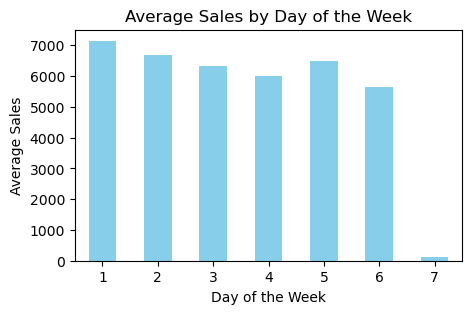

In [20]:
# Calculate average sales by day of the week
sales_by_day = train_df_merged.groupby('DayOfWeek')['Sales'].mean()
print(sales_by_day)

# Plotting the sales by day of the week
plt.figure(figsize=(5, 3))
sales_by_day.plot(kind='bar', color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.title('Average Sales by Day of the Week')
plt.xticks(rotation=0)
plt.show()


**impact of promotions**

Promo
0    4250.614772
1    7512.835578
Name: Sales, dtype: float64


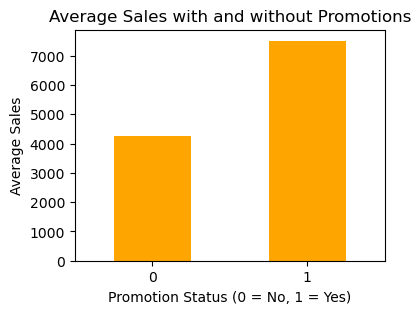

In [23]:
# Calculate average sales for promo vs non-promo days
sales_by_promo = train_df_merged.groupby('Promo')['Sales'].mean()
print(sales_by_promo)
# Plotting the sales by promotion status
plt.figure(figsize=(4, 3))
sales_by_promo.plot(kind='bar', color='orange')
plt.xlabel('Promotion Status (0 = No, 1 = Yes)')
plt.ylabel('Average Sales')
plt.title('Average Sales with and without Promotions')
plt.xticks(rotation=0)
plt.show()


**Sales and Competitor Analysis**

CompetitionDistance
(-55.84, 7604.0]      5450.074424
(7604.0, 15188.0]     5466.832941
(15188.0, 22772.0]    5650.788538
(22772.0, 30356.0]    5477.067523
(30356.0, 37940.0]    5189.897299
(37940.0, 45524.0]    5532.589117
(45524.0, 53108.0]    4743.647667
(53108.0, 60692.0]    6014.961538
(60692.0, 68276.0]            NaN
(68276.0, 75860.0]    7064.387309
Name: Sales, dtype: float64


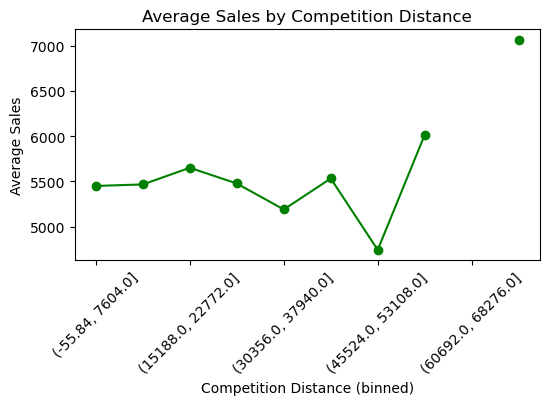

In [24]:
# Analyze sales against competition distance
sales_by_competition_distance = train_df_merged.groupby(pd.cut(train_df_merged['CompetitionDistance'], bins=10))['Sales'].mean()
print(sales_by_competition_distance)
# Plotting the sales by competition distance
plt.figure(figsize=(6, 3))
sales_by_competition_distance.plot(kind='line', marker='o', color='green')
plt.xlabel('Competition Distance (binned)')
plt.ylabel('Average Sales')
plt.title('Average Sales by Competition Distance')
plt.xticks(rotation=45)
plt.show()


**Customer Sales Relationship**

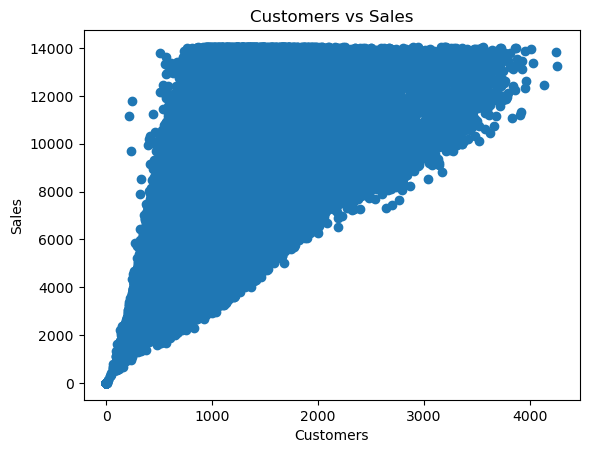

In [19]:
# Scatter plot for Customers vs Sales
import matplotlib.pyplot as plt

plt.scatter(train_df_merged['Customers'], train_df_merged['Sales'])
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.title('Customers vs Sales')
plt.show()


### **Time Analysis**

**Time Series Analysis**

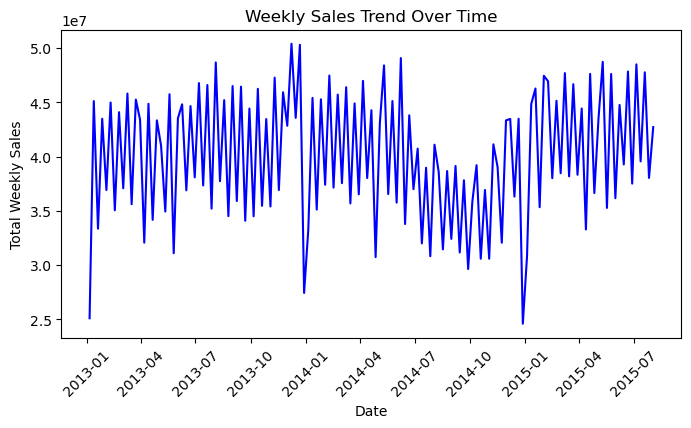

<Figure size 700x500 with 0 Axes>

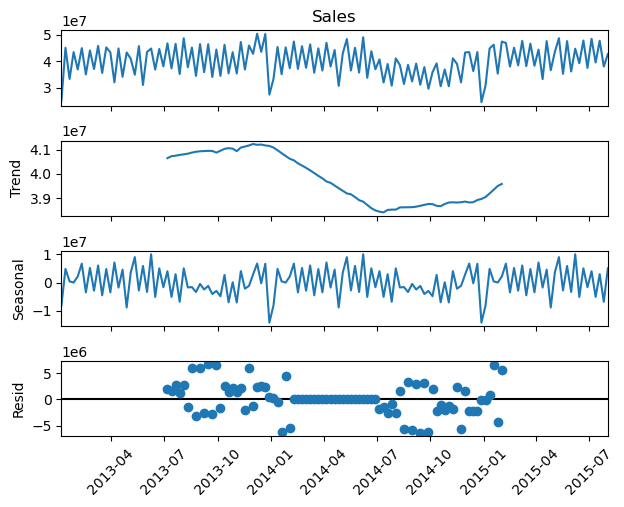

In [37]:
# Resample the data to get weekly sales totals (or averages)
weekly_sales = train_df_merged['Sales'].resample('W').sum()

# Plotting the overall sales trend over time
plt.figure(figsize=(8, 4))
plt.plot(weekly_sales, color='blue')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.title('Weekly Sales Trend Over Time')
plt.xticks(rotation=45)
plt.show()

# Perform seasonal decomposition of the time series (additive model)
decomposition = seasonal_decompose(weekly_sales, model='additive')

# Plotting the decomposition
plt.figure(figsize=(7, 5))
decomposition.plot()
plt.xticks(rotation=45)
plt.show()



**Impact Of School Holidays**

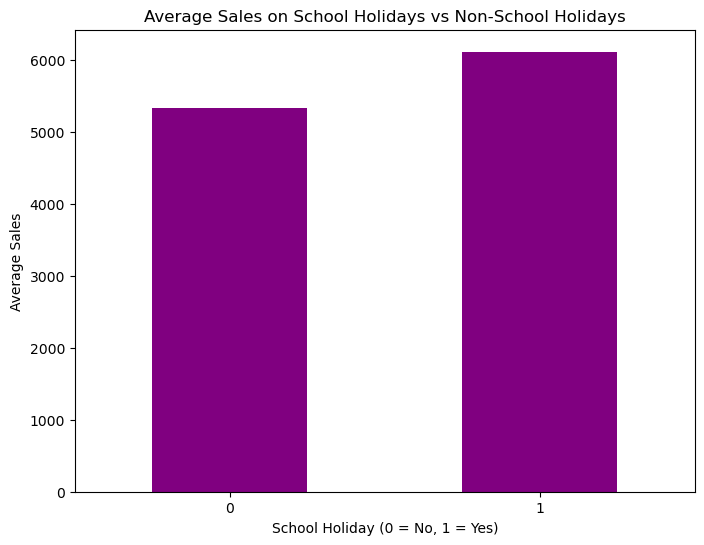

In [38]:
# Calculate average sales on school holidays vs non-school holidays
sales_by_school_holiday = train_df_merged.groupby('SchoolHoliday')['Sales'].mean()

# Plotting the average sales on school holidays vs non-school holidays
plt.figure(figsize=(8, 6))
sales_by_school_holiday.plot(kind='bar', color='purple')
plt.xlabel('School Holiday (0 = No, 1 = Yes)')
plt.ylabel('Average Sales')
plt.title('Average Sales on School Holidays vs Non-School Holidays')
plt.xticks(rotation=0)
plt.show()


**Store Type and Assortment Analysis**

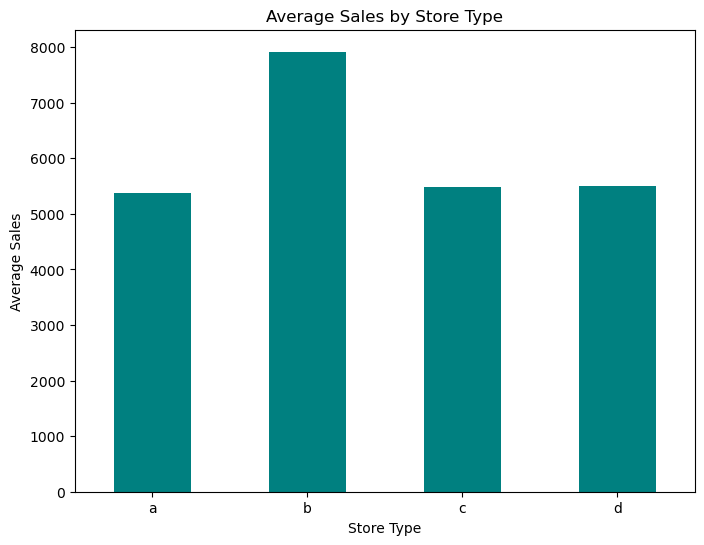

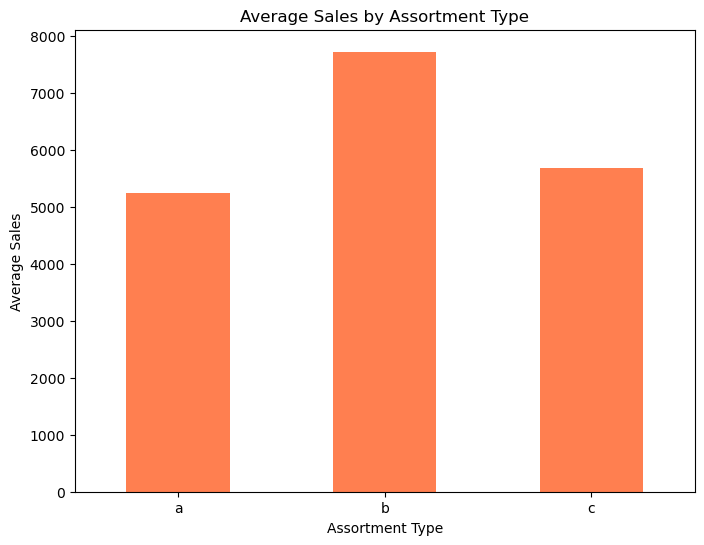

In [39]:
# Calculate average sales by store type
sales_by_store_type = train_df_merged.groupby('StoreType')['Sales'].mean()

# Plotting the average sales by store type
plt.figure(figsize=(8, 6))
sales_by_store_type.plot(kind='bar', color='teal')
plt.xlabel('Store Type')
plt.ylabel('Average Sales')
plt.title('Average Sales by Store Type')
plt.xticks(rotation=0)
plt.show()

# Calculate average sales by assortment
sales_by_assortment = train_df_merged.groupby('Assortment')['Sales'].mean()

# Plotting the average sales by assortment
plt.figure(figsize=(8, 6))
sales_by_assortment.plot(kind='bar', color='coral')
plt.xlabel('Assortment Type')
plt.ylabel('Average Sales')
plt.title('Average Sales by Assortment Type')
plt.xticks(rotation=0)
plt.show()


**Sales Impact of Store Openings and Closures**

Sales_1_week_before    336.667440
Sales                    0.000000
Sales_1_week_after     320.289839
dtype: float64


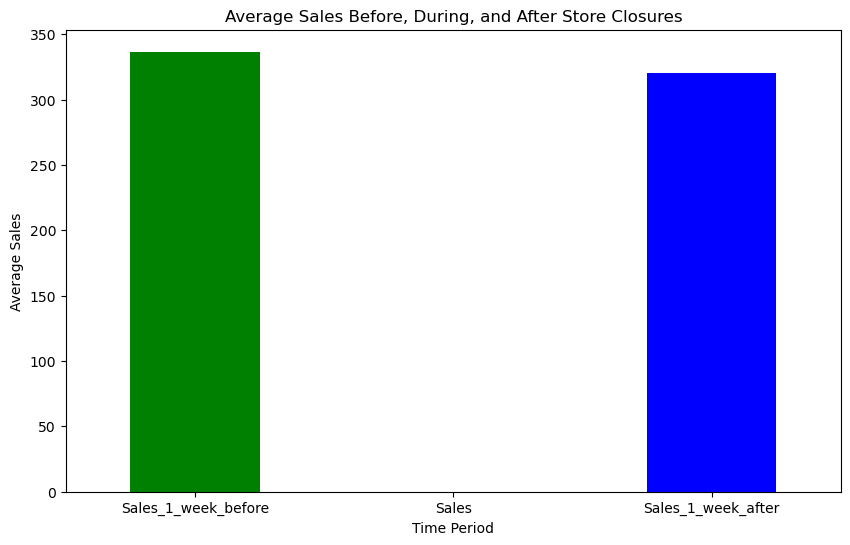

In [41]:
import pandas as pd
import matplotlib.pyplot as plt


# Identify periods when stores are closed
store_closures = train_df_merged[train_df_merged['Open'] == 0]

# Analyze sales before and after closures
# Calculate the average sales one week before closure, during closure, and one week after reopening

# Shifting to get sales before closure and after reopening
train_df_merged['Sales_1_week_before'] = train_df_merged['Sales'].shift(7)
train_df_merged['Sales_1_week_after'] = train_df_merged['Sales'].shift(-7)

# Filtering out the rows where stores were closed
closure_analysis = train_df_merged[(train_df_merged['Open'] == 0)]

# Aggregating the data to compare sales
closure_summary = closure_analysis[['Sales_1_week_before', 'Sales', 'Sales_1_week_after']].mean()

# Displaying the summary (use this in Jupyter Notebook to display the dataframe)
print(closure_summary)

# Plotting the sales impact around store closures
plt.figure(figsize=(10, 6))
closure_summary.plot(kind='bar', color=['green', 'red', 'blue'])
plt.xlabel('Time Period')
plt.ylabel('Average Sales')
plt.title('Average Sales Before, During, and After Store Closures')
plt.xticks(rotation=0)
plt.show()


**Store Clustering Analysis Code**

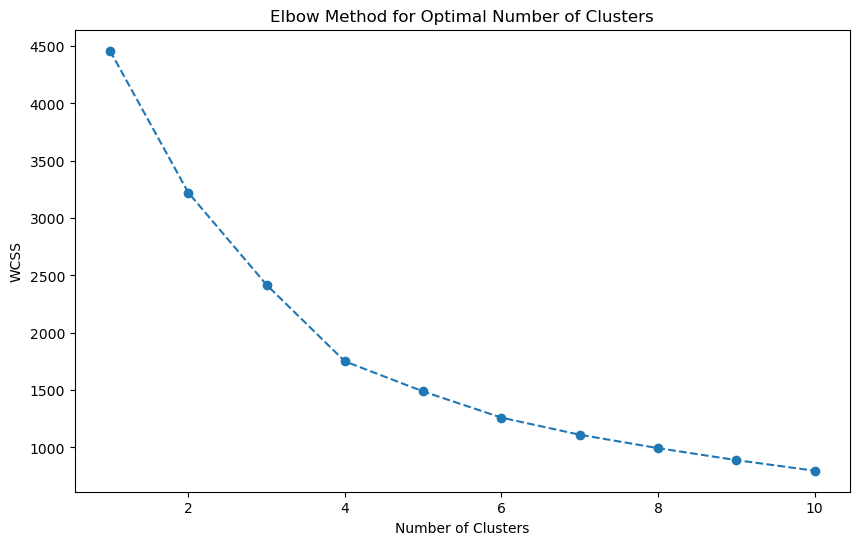

               Sales    Customers     Promo  CompetitionDistance
Cluster                                                         
0        4612.345111   475.542467  0.380798          6313.333333
1        7616.775335  1093.770607  0.117243          2328.437500
2        6859.513029   782.254772  0.366374          4087.898010


/var/folders/dc/ldz3k5913l3gjmcgcw60g3x80000gp/T/ipykernel_52459/1022221362.py:59: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = store_clustering_data.groupby('Cluster').mean()


<Figure size 1200x600 with 0 Axes>

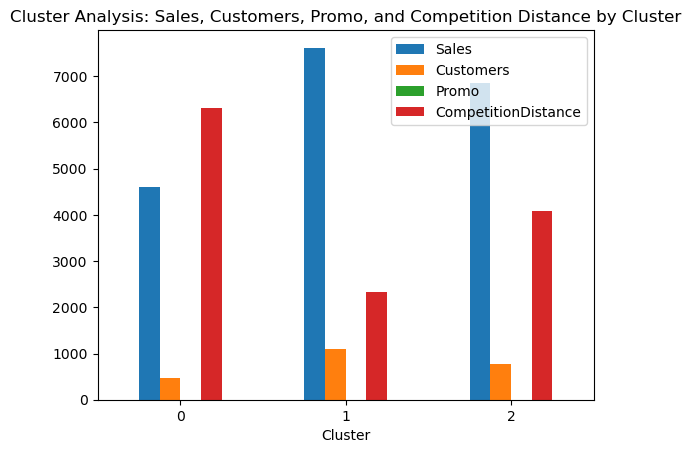

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Ensure relevant columns are numeric
train_df_merged['Sales'] = pd.to_numeric(train_df_merged['Sales'], errors='coerce')
train_df_merged['Customers'] = pd.to_numeric(train_df_merged['Customers'], errors='coerce')
train_df_merged['Promo'] = pd.to_numeric(train_df_merged['Promo'], errors='coerce')
train_df_merged['CompetitionDistance'] = pd.to_numeric(train_df_merged['CompetitionDistance'], errors='coerce')

# Select relevant features for clustering
# We'll calculate the average sales, average customers, average promo participation, and average competition distance for each store
store_clustering_data = train_df_merged.groupby('Store').agg({
    'Sales': 'mean',
    'Customers': 'mean',
    'Promo': 'mean',
    'CompetitionDistance': 'mean'
}).reset_index()

# Handling any missing values by filling with 0 (which makes sense for CompetitionDistance if missing)
store_clustering_data.fillna(0, inplace=True)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(store_clustering_data[['Sales', 'Customers', 'Promo', 'CompetitionDistance']])

# Convert back to DataFrame for easier interpretation later
scaled_store_data = pd.DataFrame(scaled_features, columns=['Sales', 'Customers', 'Promo', 'CompetitionDistance'])
scaled_store_data['Store'] = store_clustering_data['Store']

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares

# Try different cluster counts
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method chart
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Applying K-means clustering with the chosen number of clusters (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original store data
store_clustering_data['Cluster'] = clusters

# Analyze the characteristics of each cluster by calculating the mean of each feature within clusters
cluster_analysis = store_clustering_data.groupby('Cluster').mean()

# Display the cluster analysis
print(cluster_analysis)

# Plotting the cluster centers for visualization
plt.figure(figsize=(12, 6))
cluster_analysis[['Sales', 'Customers', 'Promo', 'CompetitionDistance']].plot(kind='bar')
plt.title('Cluster Analysis: Sales, Customers, Promo, and Competition Distance by Cluster')
plt.xticks(rotation=0)
plt.show()


Steps in the Analysis:
Data Preparation:

Type Casting: We ensured that the critical columns (Sales, Customers, Promo, CompetitionDistance) were treated as numeric data types. This step was necessary to perform aggregation functions like mean without errors.

Aggregation: We aggregated the data by store, calculating the average sales, customer visits, promo participation, and competition distance for each store.

Feature Standardization:

Standardization: We standardized the features (Sales, Customers, Promo, CompetitionDistance) to ensure that each variable contributed equally to the clustering process. This was done using StandardScaler, which transformed the data to have a mean of 0 and a standard deviation of 1.

Determining the Optimal Number of Clusters:

Elbow Method: We used the Elbow Method to identify the optimal number of clusters. This method involves plotting the within-cluster sum of squares (WCSS) against the number of clusters. The "elbow" point in the plot suggests the optimal number of clusters, where adding more clusters beyond this point yields diminishing returns in reducing WCSS.

K-means Clustering:

Clustering: We applied the K-means algorithm with the chosen number of clusters (3 clusters in this case). The algorithm grouped the stores into three clusters based on their average sales, customers, promo participation, and competition distance.

Cluster Analysis:

Cluster Characterization: We analyzed the characteristics of each cluster by calculating the mean values of sales, customers, promo participation, and competition distance for each cluster.

Visualization:

Bar Chart: We visualized the average values of the key features (Sales, Customers, Promo, CompetitionDistance) for each cluster using a bar chart. This allowed us to see how the clusters differ in terms of these characteristics.

Findings from the Analysis:

Cluster 0:

Sales: This cluster might represent stores with lower average sales.
Customers: These stores may also have lower customer footfall.
Promo Participation: The average participation in promotions could vary but might be lower compared to other clusters.
Competition Distance: These stores may be located in areas with less competition, or conversely, very high competition could be affecting their performance.

Cluster 1:

Sales: These stores show mid-level performance in terms of sales.
Customers: Customer visits might be moderate, indicating balanced performance.
Promo Participation: This cluster could represent stores with a balanced approach to promotions.
Competition Distance: The competition distance could be moderate, possibly in more competitive areas than Cluster 0.

Cluster 2:

Sales: Stores in this cluster have higher average sales, marking them as top performers.

Customers: High customer footfall is characteristic of these stores.

Promo Participation: These stores likely participate in promotions more frequently or effectively.

Competition Distance: Despite potentially closer competitors, these stores perform well, possibly due to strong customer loyalty or effective promotions.

Strategic Implications:

Cluster 0 (Lower Performers):

Strategy: Focus on increasing foot traffic through targeted promotions, improving product assortments, or even considering store relocations if competition is too fierce.

Cluster 1 (Moderate Performers):

Strategy: Maintain current strategies while exploring opportunities for incremental improvements, such as optimizing promotions or enhancing customer experience.

Cluster 2 (Top Performers):

Strategy: These stores are likely models for success. Continue with current strategies, potentially piloting new initiatives that could be rolled out to other clusters if successful.
This clustering analysis helps Rossman tailor its strategies according to the specific needs and characteristics of different store segments, potentially leading to improved overall performance.

